In [1]:
import requests
import inspect
import pytz
import pandas as pd
import numpy as np

from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YEARLY, DateFormatter,rrulewrapper, RRuleLocator, drange)
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from time import ctime   # ctime converts epoch time (ex:1661522400) to string form (Thu Aug 25 16:00:00 2022)
from time import gmtime   # Convert a time expressed in seconds since the epoch to a struct_time in UTC in which the dst flag is always zero.
from time import localtime # Like gmtime() but converts to local time.

from datetime import datetime, timedelta
today = datetime.now()
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 20

import time
start = time.time()




### 2 fichiers créés par node-red et mis à jour toutes les heures avec openweather node dans onglet Temp/Hum

#### json_file ="C:/Users/jean/OneDrive/Bureau/5days.txt"

#### json_file ="Y:/Documents/5days.txt"

#### le fichier contient une liste de 40 lignes :
- une ligne = 3 heures, 
- 8 lignes par jour 
- sur 5 jours


In [2]:
try:
    json_file = "Y:/Documents/5days.txt"  # pc cuisine
    current = pd.read_json(json_file)
except:
    json_file = "W:/Documents/5days.txt"  # pc chambre
    current = pd.read_json(json_file)
print(json_file)

Y:/Documents/5days.txt


In [3]:
#current['dates'] = [datetime.fromtimestamp(current.dt[k], pytz.timezone('Europe/Paris')) for k in range(40)]
current['dates'] = [datetime.fromtimestamp(current.dt[k]) for k in range(40)]
current['h_date'] = [datetime.fromtimestamp(current.dt[k]).strftime('%d/%m/%Y %H:%M:%S') for k in range(40)]
current['h_time'] = [datetime.fromtimestamp(current.dt[k]).strftime('%H') for k in range(40)]
current.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   temp        40 non-null     float64       
 1   feels_like  40 non-null     float64       
 2   temp_min    40 non-null     float64       
 3   temp_max    40 non-null     float64       
 4   pressure    40 non-null     int64         
 5   sea_level   40 non-null     int64         
 6   grnd_level  40 non-null     int64         
 7   humidity    40 non-null     int64         
 8   temp_kf     40 non-null     float64       
 9   dt          40 non-null     int64         
 10  dates       40 non-null     datetime64[ns]
 11  h_date      40 non-null     object        
 12  h_time      40 non-null     object        
dtypes: datetime64[ns](1), float64(5), int64(5), object(2)
memory usage: 4.2+ KB


In [4]:
debut = current.head(1).h_date[0]
fin = current.tail(1).h_date[39]
debut, fin

('22/05/2025 17:00:00', '27/05/2025 14:00:00')

<Axes: >

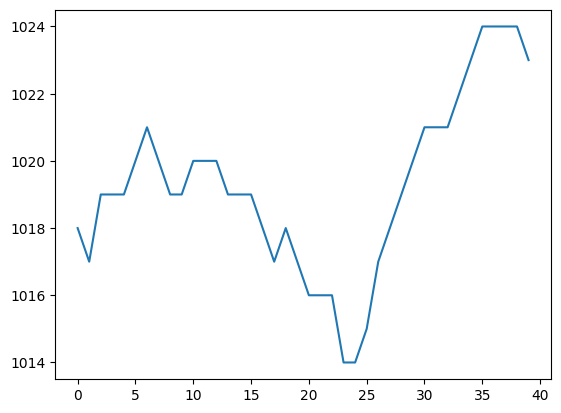

In [5]:
current.pressure.plot()


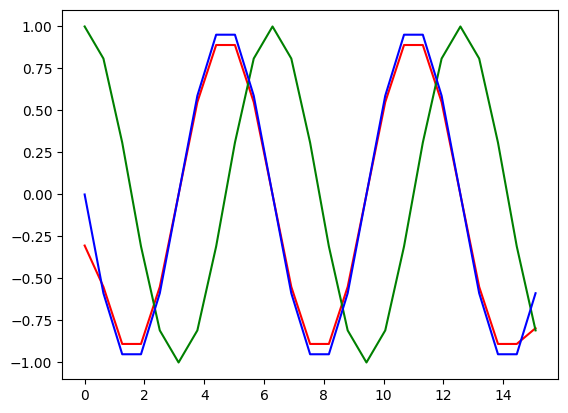

In [6]:
pi = np.pi
x = np.arange(0,5*pi,0.2*pi)
y = np.cos(x) 
# derivative dy/dx = -sin(x)
der = np.gradient(y,x)
plt.plot(x, der, 'r', x, y, 'g', x, -np.sin(x),'b')
plt.show()

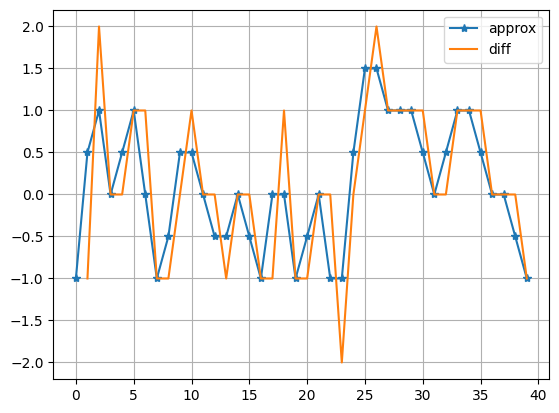

In [7]:
# derivative of pressure
dy = current.pressure#.diff()
#dy.plot()
# we sample a sin(x) function
dx = current.index.step
x = np.arange(0,40)
#current.pressure.diff().plot(label='diff')
# we calculate the derivative, with np.gradient
plt.plot(x,np.gradient(dy, dx), '-*', label='approx')
#plt.plot()
dy.diff().plot(x=x,label='diff')
plt.legend()
plt.grid()


<Axes: >

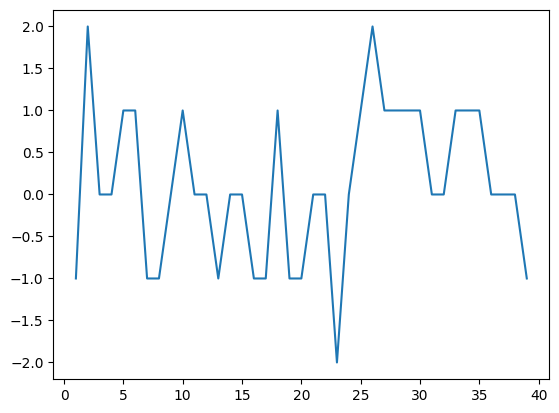

In [8]:
dy.diff().plot()

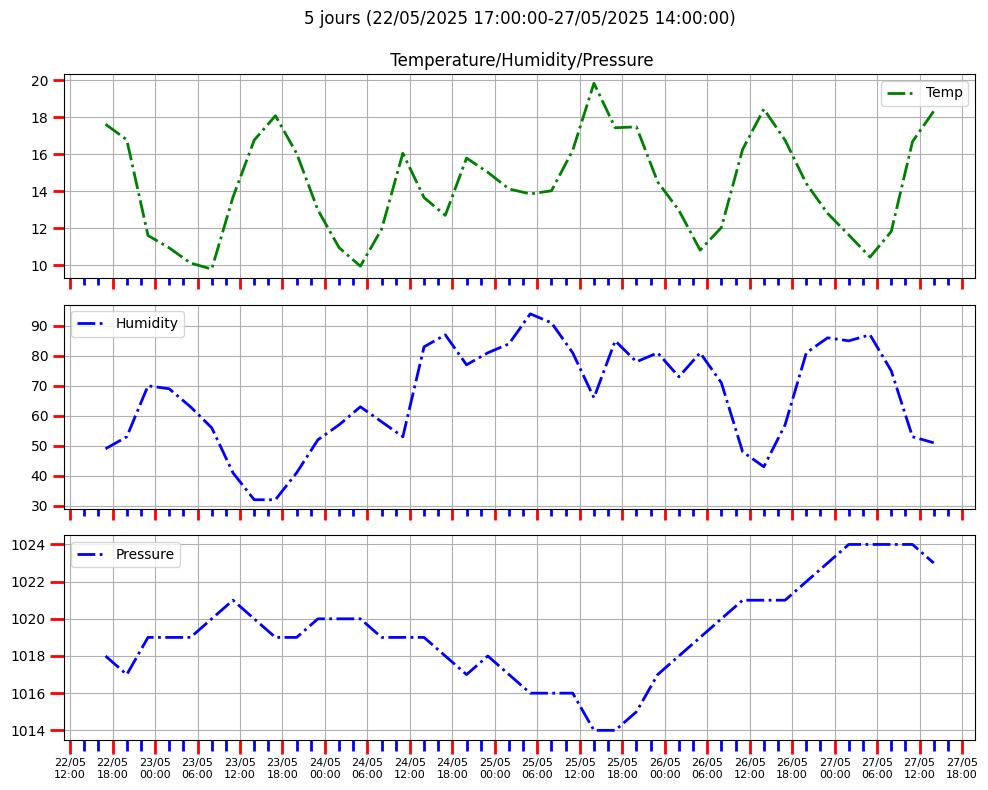

In [9]:
#fig, (ax1,ax2,ax3) = plt.subplots(3,1)
fig, (ax1,ax2,ax3) = plt.subplots(3, sharex=True)
# the size of A4 paper
fig.set_size_inches(10, 8)

ax1.tick_params('x', labelsize=8)
ax2.tick_params('x', labelsize=8)
ax3.tick_params('x', labelsize=8)

# format affichage dates sur axe des x
formatter = DateFormatter('%d/%m\n%H:%M')
#ax1.xaxis.set_major_formatter(formatter)
#ax2.xaxis.set_major_formatter(formatter)
ax3.xaxis.set_major_formatter(formatter)

# nombre de ticks sur axe des x
major_ticks = 1/4                    # toutes les 6 heures pour 1/4, 12h pour 1/2
minor_ticks = major_ticks/3          # facteur div = 4  -> minor ticks toutes les 3 heures

# temperature
ax1.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax1.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  # ???? pas d'affichage des minor ticks ???
# format des ticks
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=8, color='r')
ax1.tick_params(which='minor', length=5, color='b')
#plot
ax1.plot(current.dates,current.temp,'g-.',label='Temp',linewidth=2)
#plt.plot(current.dates,current.temp_max,'r-.',label='Max',linewidth=2)
#plt.plot(current.dates,current.temp_min,'b-.',label='Min',linewidth=2)

# humidity
ax2.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax2.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  
# format des ticks
ax2.tick_params(which='both', width=2)
ax2.tick_params(which='major', length=8, color='r')
ax2.tick_params(which='minor', length=5, color='b')
ax2.plot(current.dates,current.humidity,'b-.',label='Humidity',linewidth=2)

# pression
ax3.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax3.xaxis.set_minor_locator(MultipleLocator(minor_ticks))  
# format des ticks
ax3.tick_params(which='both', width=2)
ax3.tick_params(which='major', length=10, color='r')
ax3.tick_params(which='minor', length=8, color='b')
ax3.plot(current.dates,current.pressure,'b-.',label='Pressure',linewidth=2)

ax1.grid()
ax1.legend()
ax2.grid()
ax2.legend()
ax3.grid()
ax3.legend()

ax1.set_title(f'5 jours ({debut}-{fin})\n\n Temperature/Humidity/Pressure')
#ax2.set_title(f'Humidity')
fig.tight_layout()


# tendances

## temp * pression / humidity
- plus de pression, moins d'humidité = meilleure tendance

In [10]:
try:
    img = plt.imread(r"Screenshot 2024-06-04 095520.png")    # don't work with svg files
    fig, ax = plt.subplots()
    x = range(300)
    ax.imshow(img, extent=[0, 400, 0, 300])
except:
    pass

Le point de rosée est une donnée thermodynamique caractérisant l'humidité dans un gaz. 
Le point de rosée de l'air est la température à laquelle la pression partielle de vapeur 
d'eau est égale à sa pression de vapeur saturante. Il s'agit donc de la température à 
laquelle il faut refroidir un volume d'air, à pression et humidité absolue constantes, 
pour qu'il devienne saturé donc il y a condensation.

La dépression du point de rosée est la différence entre la température et le point de rosée : (T-Tr)
 à un niveau de pression donnée de l'atmosphère terrestre

 https://fr.wikipedia.org/wiki/Point_de_ros%C3%A9e


La dépression du point de rosée est la différence entre la température et le point de rosée (T-Tr) à un niveau de pression donnée de l'atmosphère terrestre7. Plus cette valeur est petite, plus l’humidité relative à cette altitude est grande et plus la présence de nuages est probable. Ainsi, une dépression de plus de 5 °C est en général associée avec l'absence de couche nuageuse et une valeur près de 0 °C est synonyme d'une couverture complète. La variation dans la troposphère de la dépression du point de rosée, analysée sur un diagramme thermodynamique comme un téphigramme, permet de connaître la hauteur, l'épaisseur et l'étendue des couches nuageuses sur une région.

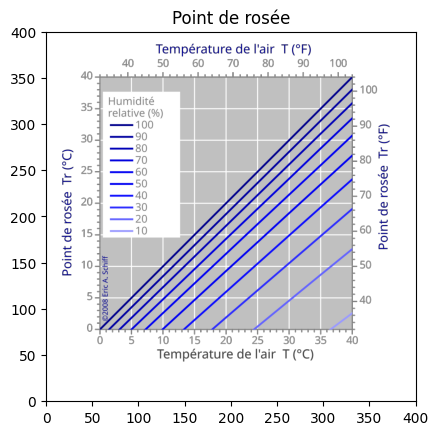

In [11]:
try:
    img = plt.imread(r"Dewpoint-RH-fr.svg.png")    # don't work with svg files
    fig, ax = plt.subplots()
    x = range(300)
    ax.imshow(img, extent=[0, 400, 0, 400])
    plt.title('Point de rosée')
except:
    pass

# si on a hum=80% à la temp=10°C, point de rosée = 7°C, depression = 10-7 = 3 < 5 (nuages)
# si on a hum=70% à la temp=10°C, point de rosée = 5°C, depression = 10-5 = 5 (clair)

In [12]:
import numpy as np
a, b = 17.27, 237.7

def alpha(T,phi):
    '''
    0 < T < 60
    0.01 < phi < 1
    '''
    return a*T/(b+T) + np.log(phi)

def dewpoint(T, phi): # phi : humidité relative
    f = alpha(T,phi)
    Tr = b*f/(a-f)
    return (T,Tr,T-Tr) #round(Tr,2), round(T-Tr,2)   # dewpoint, depression


In [13]:
dewpoint(17,.92)

(17, np.float64(15.689111824765133), np.float64(1.310888175234867))

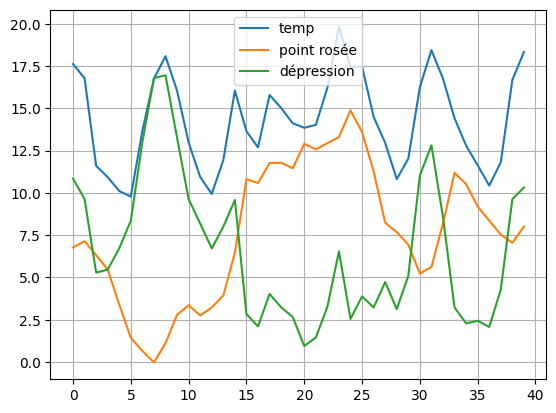

In [14]:
x = np.arange(40)
x_temp = current.temp
x_hum = current.humidity/100

rosee = dewpoint(x_temp,x_hum)
plt.plot(x,x_temp,label='temp')
plt.plot(x,rosee[1],label='point rosée')
plt.plot(x,rosee[2],label='dépression')
plt.grid()
plt.legend()


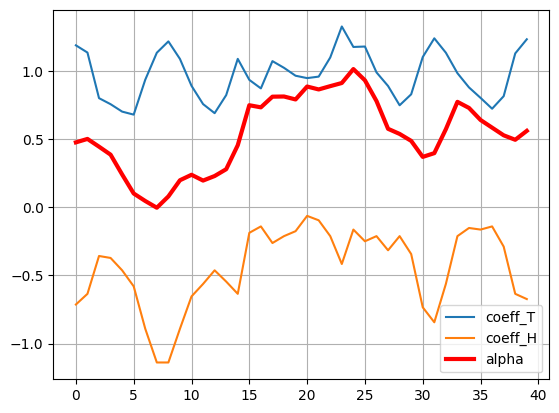

In [15]:
# alpha(temp,hum)
y_temp = a*x_temp/(b+x_temp)
y_hum = np.log(x_hum)
plt.plot(x,y_temp,label='coeff_T')
plt.plot(x,y_hum,label='coeff_H')  # valeurs négatives
f = y_temp+y_hum  # alpha() = y_temp + y_hum
plt.plot(x,f,label='alpha',lw=3,c='red')
plt.grid()
plt.legend()


(237.7, 17.27)

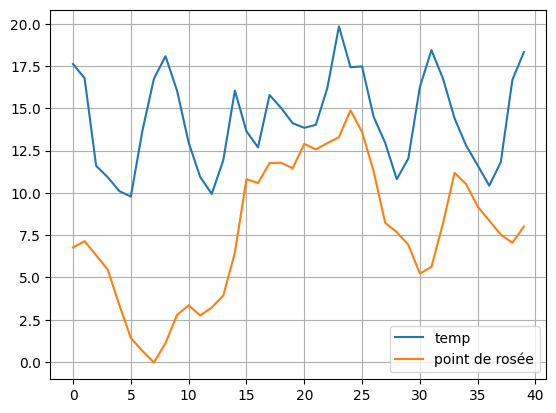

In [16]:
# point de rosée
plt.plot(x,x_temp,label='temp')
plt.plot(x,b*f/(a-f),label='point de rosée')
plt.grid()
plt.legend()
b,a


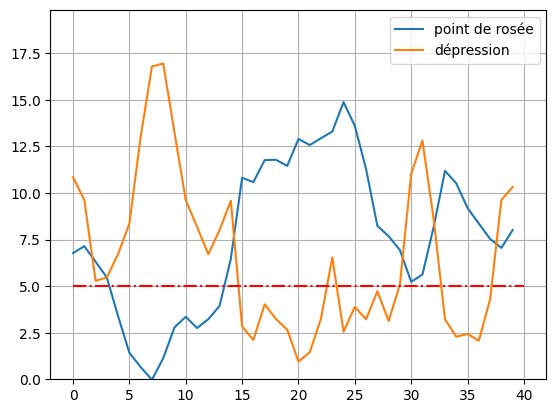

In [17]:
plt.plot(x,b*f/(a-f),label='point de rosée')
plt.plot(x,x_temp - b*f/(a-f),label='dépression')
plt.plot((0,40),(5,5),'r-.')  # si depression < 5, risuqe de nuages et pluie
plt.grid()
plt.ylim(0,max(x_temp))
plt.legend()

In [18]:
# alpha
f = y_temp+y_hum
f, alpha(x_temp,x_hum)


(0     0.478478
 1     0.503878
 2     0.446903
 3     0.388141
 4     0.242535
         ...   
 35    0.643040
 36    0.586672
 37    0.530414
 38    0.497536
 39    0.563070
 Length: 40, dtype: float64,
 0     0.478478
 1     0.503878
 2     0.446903
 3     0.388141
 4     0.242535
         ...   
 35    0.643040
 36    0.586672
 37    0.530414
 38    0.497536
 39    0.563070
 Length: 40, dtype: float64)

In [19]:
(x,y_hum)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 0    -0.713350
 1    -0.634878
 2    -0.356675
 3    -0.371064
 4    -0.462035
         ...   
 35   -0.162519
 36   -0.139262
 37   -0.287682
 38   -0.634878
 39   -0.673345
 Name: humidity, Length: 40, dtype: float64)

In [20]:
dewpoint(current.temp[0],current.humidity[0]/100)

(np.float64(17.62),
 np.float64(6.773306693676141),
 np.float64(10.84669330632386))

In [21]:
dewpt = dewpoint(current.temp ,current.humidity/100) 
dewpt[1] # point de rosée

0     6.773307
1     7.143674
2     6.314465
3     5.465106
4     3.385745
        ...   
35    9.192943
36    8.358765
37    7.531816
38    7.051102
39    8.011144
Length: 40, dtype: float64

In [22]:
dewpt[2]   # dépression

0     10.846693
1      9.636326
2      5.285535
3      5.464894
4      6.724255
        ...    
35     2.437057
36     2.071235
37     4.288184
38     9.628898
39    10.318856
Length: 40, dtype: float64

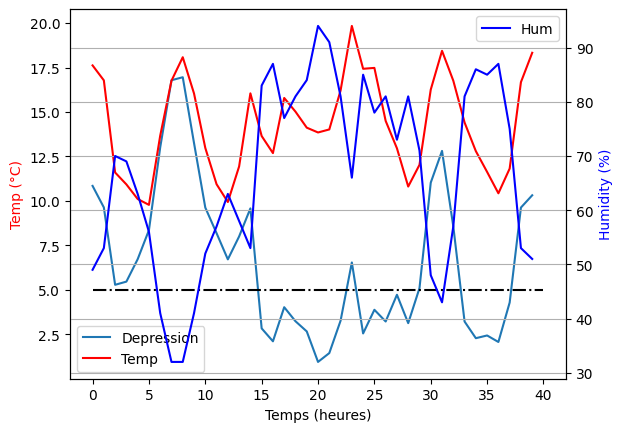

In [23]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(dewpt[2],label='Depression')
ax1.plot(current.temp,'r',label='Temp')
ax2.plot(current.humidity,'b',label='Hum')
ax1.plot((0,40),(5,5),'k-.')  # black
#plt.ylim(min(dewpt[2])-2,max(current.temp)+2)
ax1.set_xlabel('Temps (heures)')
ax1.set_ylabel('Temp (°C)', color='r')
ax2.set_ylabel('Humidity (%)', color='b')
ax1.legend()
ax2.legend()
plt.grid()
plt.show()


In [24]:
current.temp.head(),current.h_time.head()

(0    17.62
 1    16.78
 2    11.60
 3    10.93
 4    10.11
 Name: temp, dtype: float64,
 0    17
 1    20
 2    23
 3    02
 4    05
 Name: h_time, dtype: object)

In [25]:
current['dew_point'] = dewpt[1]
current[['h_time','temp','dew_point']]

,h_time,temp,dew_point
0,17,17.62,6.773307
1,20,16.78,7.143674
2,23,11.60,6.314465
3,02,10.93,5.465106
4,05,10.11,3.385745
...,...,...,...
35,02,11.63,9.192943
36,05,10.43,8.358765
37,08,11.82,7.531816
38,11,16.68,7.051102


In [26]:
current.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   temp        40 non-null     float64       
 1   feels_like  40 non-null     float64       
 2   temp_min    40 non-null     float64       
 3   temp_max    40 non-null     float64       
 4   pressure    40 non-null     int64         
 5   sea_level   40 non-null     int64         
 6   grnd_level  40 non-null     int64         
 7   humidity    40 non-null     int64         
 8   temp_kf     40 non-null     float64       
 9   dt          40 non-null     int64         
 10  dates       40 non-null     datetime64[ns]
 11  h_date      40 non-null     object        
 12  h_time      40 non-null     object        
 13  dew_point   40 non-null     float64       
dtypes: datetime64[ns](1), float64(6), int64(5), object(2)
memory usage: 4.5+ KB


In [27]:
current.dates

0    2025-05-22 17:00:00
1    2025-05-22 20:00:00
2    2025-05-22 23:00:00
3    2025-05-23 02:00:00
4    2025-05-23 05:00:00
             ...        
35   2025-05-27 02:00:00
36   2025-05-27 05:00:00
37   2025-05-27 08:00:00
38   2025-05-27 11:00:00
39   2025-05-27 14:00:00
Name: dates, Length: 40, dtype: datetime64[ns]

In [28]:
formatter = DateFormatter('%d/%m\n%H:%M')
formatter

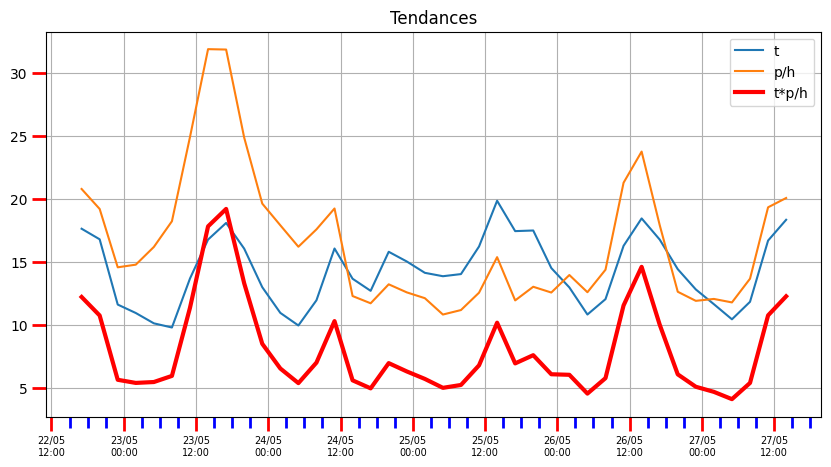

In [29]:
result1=current.temp  #*current.humidity*current.pressure
result2=(current.pressure)/(current.humidity*10)  #p/h est normalisé, on ramène le rapport autour de 1
result3=(current.temp)*result2

fig, ax = plt.subplots()

# nombre de ticks sur axe des x
major_ticks = 1/2                   # toutes les 6 heures pour 1/4, 12h pour 1/2, 3 heures pour 1/8
minor_ticks = major_ticks/4          # denominateur n = n minor ticks 


# format grid
fig.set_size_inches(10, 5)
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
ax.tick_params('x', labelsize=7)
ax.tick_params(which='both', width=2)
ax.tick_params(which='major', length=10, color='r')
ax.tick_params(which='minor', length=8, color='b')

# plot
plt.plot(current.dates, result1,label='t')
plt.plot(current.dates, result2*10,label='p/h')
plt.plot(current.dates, result3/3,label='t*p/h',lw=3,c='red')
plt.legend()
plt.title('Tendances')
plt.grid()

<Axes: >

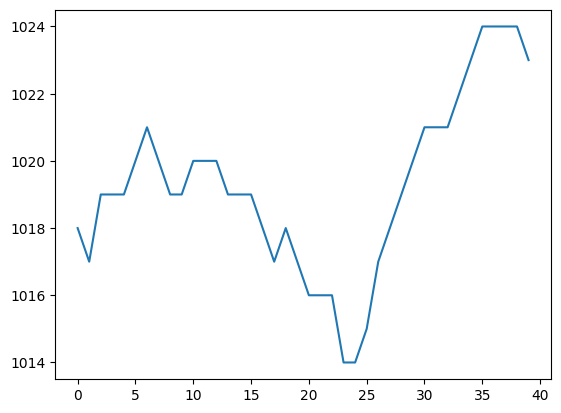

In [30]:
current.pressure.plot()

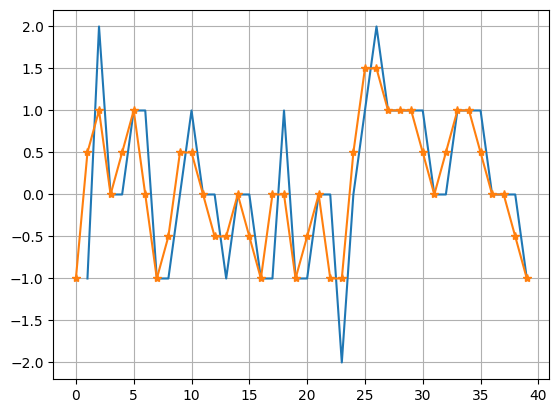

In [31]:
dy.diff().plot()
plt.plot(x,np.gradient(dy, dx), '-*', label='approx')
plt.grid()

In [32]:
len(dy)

40

In [33]:
current.dates

0    2025-05-22 17:00:00
1    2025-05-22 20:00:00
2    2025-05-22 23:00:00
3    2025-05-23 02:00:00
4    2025-05-23 05:00:00
             ...        
35   2025-05-27 02:00:00
36   2025-05-27 05:00:00
37   2025-05-27 08:00:00
38   2025-05-27 11:00:00
39   2025-05-27 14:00:00
Name: dates, Length: 40, dtype: datetime64[ns]

In [34]:
current.h_date

0     22/05/2025 17:00:00
1     22/05/2025 20:00:00
2     22/05/2025 23:00:00
3     23/05/2025 02:00:00
4     23/05/2025 05:00:00
             ...         
35    27/05/2025 02:00:00
36    27/05/2025 05:00:00
37    27/05/2025 08:00:00
38    27/05/2025 11:00:00
39    27/05/2025 14:00:00
Name: h_date, Length: 40, dtype: object

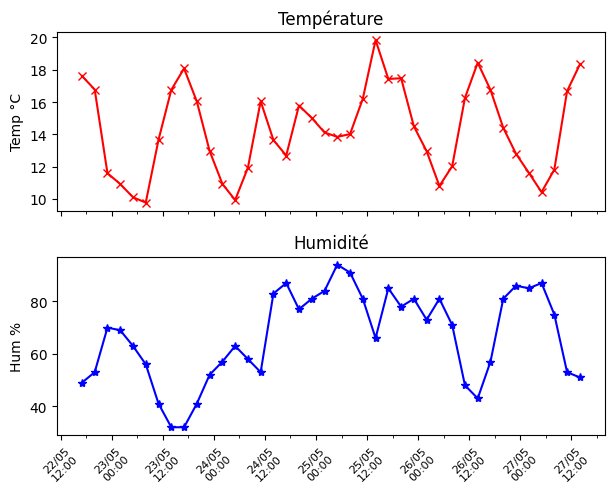

In [35]:
formatter = DateFormatter('%d/%m\n%H:%M')
fig, (ax1,ax2) = plt.subplots(2,1,sharex=True,)
temp = current.temp 
#temp.plot(grid=True, ax=ax1)
ax1.title.set_text('Température')
ax1.set_ylabel('Temp °C')
ax2.title.set_text('Humidité')
plt.tight_layout()
#current.humidity.plot(grid=True, ax=ax2)
ax2.set_ylabel('Hum %')
# plot
ax1.plot(current.dates, temp,'x-',label='temp',color='r')
ax2.plot(current.dates, current.humidity,'*-',label='%hum',color='blue')

#ax2.set(xticks=x, xticklabels=current.dates)
ax2.xaxis.set_major_formatter(formatter)
ax2.xaxis.set_major_locator(MultipleLocator(1/2))  
ax2.xaxis.set_minor_locator(MultipleLocator(1/4))

#ax2.set(xticks=x, xticklabels=current.dates)
ax2.tick_params('x', labelsize=8, rotation=45)

In [36]:

handles, labels = ax1.get_legend_handles_labels()
handles, labels 

([<matplotlib.lines.Line2D at 0x1d7e7c03250>], ['temp'])

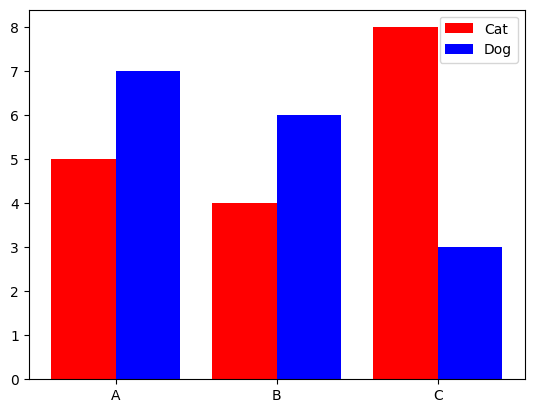

In [37]:
xticks = ['A','B','C']
Scores = np.array([[5,7],[4,6],[8,3]])
colors = ['red','blue']
names = ["Cat", "Dog"]

fig, ax = plt.subplots()

x = np.arange(len(Scores))
ax.bar(x-0.2, Scores[:,0], color=colors[0], width=0.4, label=names[0])
ax.bar(x+0.2, Scores[:,1], color=colors[1], width=0.4, label=names[1])
ax.set(xticks=x, xticklabels=xticks)
ax.legend()
plt.show()

In [38]:
datetime.now().strftime('%d/%m/%Y %H:%M:%S')

'22/05/2025 21:40:02'

In [39]:
end = time.time()
print(end - start)

9.500771522521973


# Tendances Météo sur 5 jours

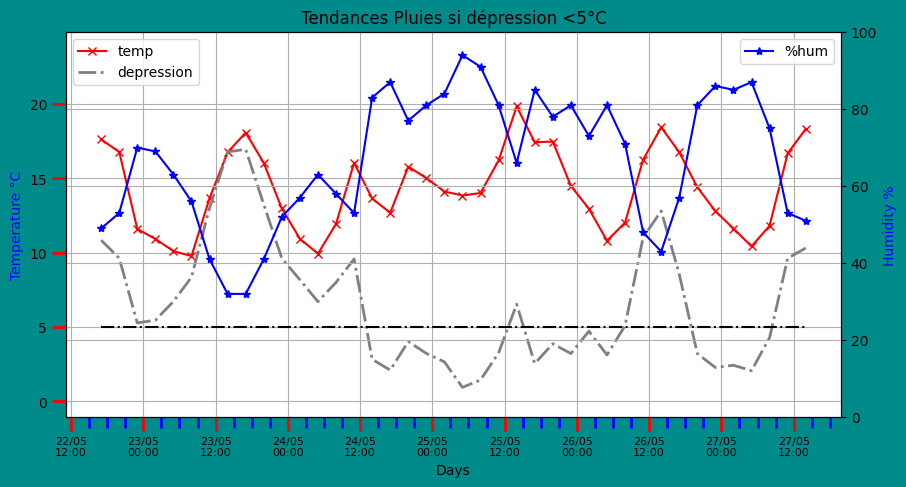

In [40]:
# point de rosée
current['dewpoint']=dewpt[1]
point_rosee = dewpt[1]
# calcul de la dépression
depression = current.temp-point_rosee
current['depression']=depression
fig, ax1 = plt.subplots(facecolor='darkcyan')
ax2 = ax1.twinx()
ax1.set_xlabel('Days')
ax1.set_ylabel('Temperature °C', color='b')
ax2.set_ylabel('Humidity %', color='b')
# format grid
fig.set_size_inches(10, 5)
# graduations axeX
ax1.xaxis.set_major_formatter(formatter)
ax1.xaxis.set_major_locator(MultipleLocator(major_ticks))  
ax1.xaxis.set_minor_locator(MultipleLocator(minor_ticks))
ax1.tick_params('x', labelsize=8)  # size of x_axis labels
ax1.tick_params(which='both', width=2)
ax1.tick_params(which='major', length=10, color='r')
ax1.tick_params(which='minor', length=8, color='b')

# plot
ax1.plot(current.dates, temp,'x-',label='temp',color='red')
ax2.plot(current.dates, current.humidity,'*-',label='%hum',color='blue')
#ax1.plot(current.dates, point_rosee,label='point de rosée')#,lw=3,c='red')
# tendances pluie
#lbl = 'depr<5+ "pluie" if depression[0]<5 else ""
ax1.plot(current.dates, depression,'-.',label="depression",lw=2,c='grey')
#ax1.plot(current.dates, depression+dy.diff(),'-.',label="depression+diffpressure",lw=2,c='blue')
ax1.plot((current.dates[0],current.dates[39]),(5,5),'-.',color='black') 

# https://stackoverflow.com/questions/28095852/set-ylim-on-subplot-secondary-y-axis
ax1.set_ylim(min(depression)-2,max(current.temp)+5)
ax2.set_ylim(0, 100)
ax1.legend(loc=2)
ax2.legend(loc=1)
plt.title('Tendances Pluies si dépression <5°C')
ax1.grid()
ax2.grid()

In [41]:
current['h_date']

0     22/05/2025 17:00:00
1     22/05/2025 20:00:00
2     22/05/2025 23:00:00
3     23/05/2025 02:00:00
4     23/05/2025 05:00:00
             ...         
35    27/05/2025 02:00:00
36    27/05/2025 05:00:00
37    27/05/2025 08:00:00
38    27/05/2025 11:00:00
39    27/05/2025 14:00:00
Name: h_date, Length: 40, dtype: object

In [42]:
current['d'] = current['h_date'].apply(lambda x: x[:2]+'\n'+x[11:13])
current['d'] 

0     22\n17
1     22\n20
2     22\n23
3     23\n02
4     23\n05
       ...  
35    27\n02
36    27\n05
37    27\n08
38    27\n11
39    27\n14
Name: d, Length: 40, dtype: object

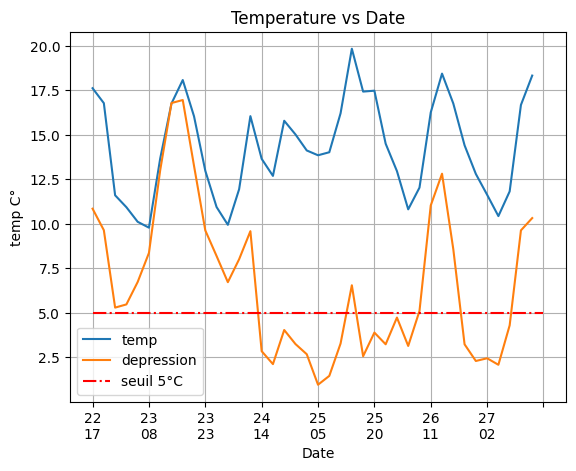

In [43]:
current[['d','temp','depression']].plot(grid=True, x='d')
# Add labels and title
plt.title('Temperature vs Date')
plt.xlabel('Date')
plt.ylabel('temp C°')
plt.plot((0,40),(5,5),'-.',c='red',label='seuil 5°C')
plt.legend()
plt.show()

<Axes: >

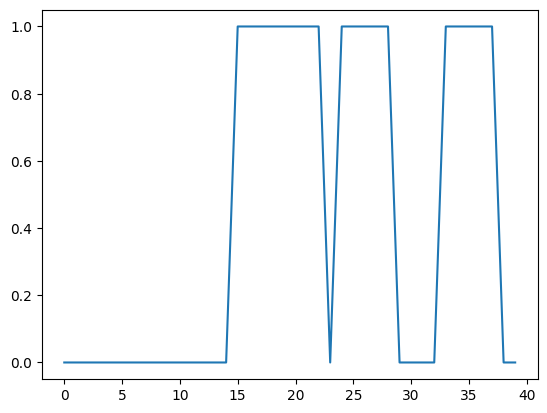

In [44]:
current['tendances']=current['depression'].apply(lambda x: 'pluie' if x<5 else 'beau temps')

trends = np.multiply(current['tendances']=='pluie',1) #== True
trends.plot()


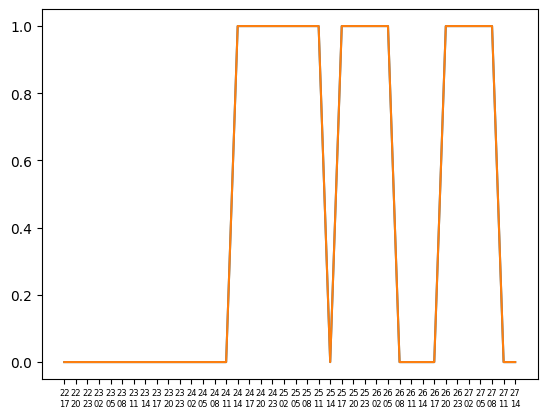

In [45]:
d= current['d']
plt.plot(d,trends)
plt.xticks(fontsize = 6) 
plt.plot(d,trends)
plt.show()         

In [46]:
bt= current.tendances == 'beau temps'
bt

0      True
1      True
2      True
3      True
4      True
      ...  
35    False
36    False
37    False
38     True
39     True
Name: tendances, Length: 40, dtype: bool

In [47]:
current[['h_date','tendances']]

,h_date,tendances
0,22/05/2025 17:00:00,beau temps
1,22/05/2025 20:00:00,beau temps
2,22/05/2025 23:00:00,beau temps
3,23/05/2025 02:00:00,beau temps
4,23/05/2025 05:00:00,beau temps
...,...,...
35,27/05/2025 02:00:00,pluie
36,27/05/2025 05:00:00,pluie
37,27/05/2025 08:00:00,pluie
38,27/05/2025 11:00:00,beau temps


In [48]:
# heure beau temps
bt = current[current.tendances == 'beau temps'][['h_date','temp']]
bt

,h_date,temp
0,22/05/2025 17:00:00,17.62
1,22/05/2025 20:00:00,16.78
2,22/05/2025 23:00:00,11.60
3,23/05/2025 02:00:00,10.93
4,23/05/2025 05:00:00,10.11
...,...,...
30,26/05/2025 11:00:00,16.26
31,26/05/2025 14:00:00,18.44
32,26/05/2025 17:00:00,16.76
38,27/05/2025 11:00:00,16.68


In [49]:

def format_date_heure(x):
    global memo
    jour = x[:2]
    heure = x[11:13]
    if jour == memo:
        jour = ''
    memo = x[:2]
    return jour+'\n'+heure


In [50]:
memo = ''
d2 = bt['h_date'].apply(lambda x: format_date_heure(x))  #x[:2]+'\n'+x[11:13])
#d2

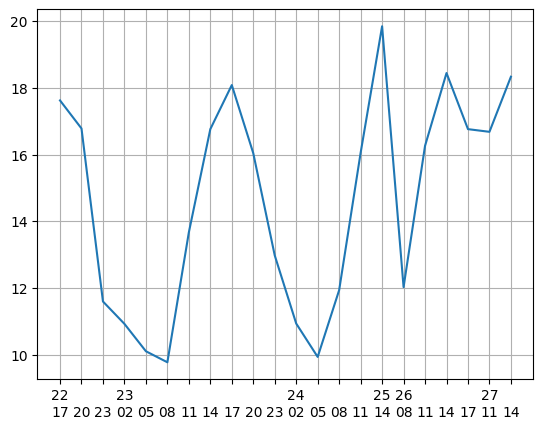

In [51]:
# format date/heure
memo = ''
d = bt['h_date'].apply(lambda x: x[:2]+'\n'+x[11:13])
plt.plot(d,bt.temp)
plt.xticks(ticks=range(len(d2)), labels=d2)
plt.grid()
plt.show()


Text(0, 0.5, 'Temperature')

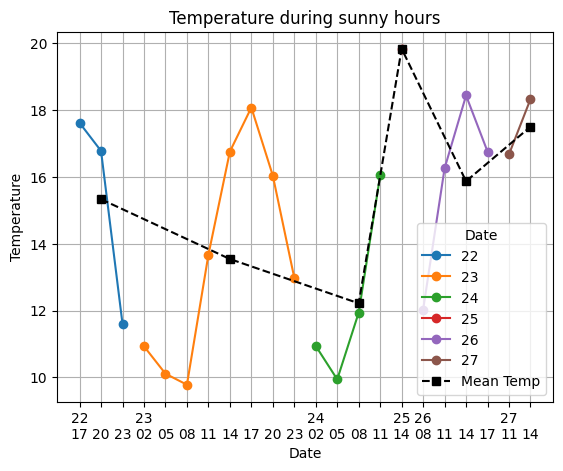

In [52]:
bt['date'] = bt['h_date'].apply(lambda x: x[:2])
#bt
btgp =bt.groupby('date')
for name, group in btgp:
    #print(name)
    plt.plot(group['h_date'], group['temp'], marker='o', linestyle='-', label=name)
plt.legend(title='Date')
plt.xlabel('Date and Time')
plt.ylabel('Temperature')
plt.title('Temperature during sunny hours')
plt.xticks(ticks=range(len(d2)), labels=d2)
plt.grid()
#plt.show()

# Add a temp mean column in btgp
bt['temp_mean'] = btgp['temp'].transform('mean')

# Plot only the first row of each group
first_rows = btgp.first()
# Plot only the nth row of each group
nth_rows = btgp.nth(2)
# Plot only the middle row of each group
middle_xaxis = btgp.apply(lambda t: t.iloc[len(t)//2])
# choose the row to plot
plotpos = middle_xaxis
plt.plot(plotpos['h_date'], first_rows['temp_mean'], marker='s', linestyle='--', color='black', label='Mean Temp')
plt.legend(title='Date')
plt.xlabel('Date')
plt.ylabel('Temperature')



In [53]:
btgp.apply(lambda t: t.iloc[len(t)//2])

,h_date,temp,date,temp_mean
date,,,,
22,22/05/2025 20:00:00,16.78,22,15.333333
23,23/05/2025 14:00:00,16.76,23,13.543750
24,24/05/2025 08:00:00,11.94,24,12.217500
25,25/05/2025 14:00:00,19.84,25,19.840000
26,26/05/2025 14:00:00,18.44,26,15.872500
27,27/05/2025 14:00:00,18.33,27,17.505000


In [54]:
# Add a cumulative mean column in btgp
bt['temp_cummean'] = btgp['temp'].transform(lambda x: x.expanding().mean())
bt[['h_date', 'temp', 'temp_mean', 'temp_cummean']]



,h_date,temp,temp_mean,temp_cummean
0,22/05/2025 17:00:00,17.62,15.333333,17.620000
1,22/05/2025 20:00:00,16.78,15.333333,17.200000
2,22/05/2025 23:00:00,11.60,15.333333,15.333333
3,23/05/2025 02:00:00,10.93,13.543750,10.930000
4,23/05/2025 05:00:00,10.11,13.543750,10.520000
...,...,...,...,...
30,26/05/2025 11:00:00,16.26,15.872500,14.145000
31,26/05/2025 14:00:00,18.44,15.872500,15.576667
32,26/05/2025 17:00:00,16.76,15.872500,15.872500
38,27/05/2025 11:00:00,16.68,17.505000,16.680000


Text(0, 0.5, 'Temperature')

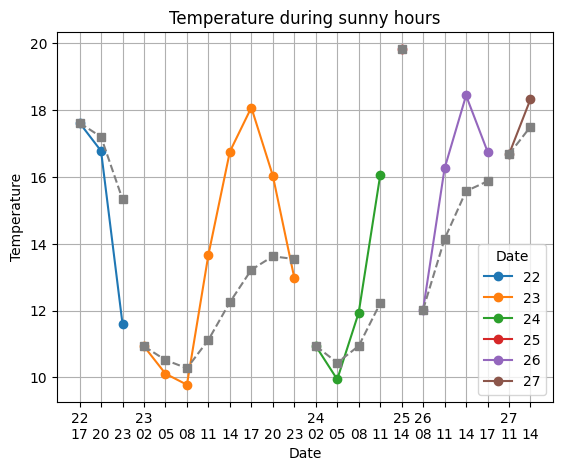

In [55]:
bt['date'] = bt['h_date'].apply(lambda x: x[:2])
#bt
btgp =bt.groupby('date')
for name, group in btgp:
    plt.plot(group['h_date'], group['temp'], marker='o', linestyle='-', label=name)
plt.legend(title='Date')
plt.xlabel('Date and Time')
plt.ylabel('Temperature')
plt.title('Temperature during sunny hours')
plt.xticks(ticks=range(len(d2)), labels=d2)
plt.grid()
#plt.show()
for name, group in btgp:   
    plt.plot(group['h_date'], group['temp_cummean'], marker='s', linestyle='--', color='grey')
#plt.plot(marker='s', linestyle='--', color='black', label='Cumul Mean Temp')
plt.legend(title='Date')
plt.xlabel('Date')
plt.ylabel('Temperature')


# test chatgpt

In [56]:
import random
random.randint(-5,5)

5

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import random

start = random.randint(8, 22)
end = random.randint(start+1, start+8)

# Example DataFrame
data2 = {
    'date': ['2023-10-01'] * 24 + ['2023-10-02'] * 24 + ['2023-10-03'] * 24 + ['2023-10-04'] * 24 + ['2023-10-05'] * 24,
    'hour': list(range(24)) * 5,
    'temperature': [20 + random.randint(-3,5) for i in range(120)],  # Example temperature data
    'rain': [0 if (i>=start and i<=end) else 1 for i in range(24)]*5  # 0 = no rain, 1 = rain
}


In [58]:

bt2 = pd.DataFrame(data2)
#bt[bt.date=='2023-10-01'][['temperature']].plot()
#bt[bt.date=='2023-10-01']['rain'].plot()
#bt['rain'].plot()
print(start, end)

# Convert 'date' column to datetime
bt2['date'] = pd.to_datetime(bt2['date'])

# Combine 'date' and 'hour' into a single datetime column
bt2['datetime'] = bt2['date'] + pd.to_timedelta(bt2['hour'], unit='h')

# Filter rows where there is no rain (sunshine hours)
sunshine_data = bt2[bt2['rain'] == 0]

# Group by date
sunshine_groups = sunshine_data.groupby('date')
sunshine_data[sunshine_data['date']=='2023-10-01'].head(10)


13 15


,date,hour,temperature,rain,datetime
13,2023-10-01,13,20,0,2023-10-01 13:00:00
14,2023-10-01,14,25,0,2023-10-01 14:00:00
15,2023-10-01,15,18,0,2023-10-01 15:00:00


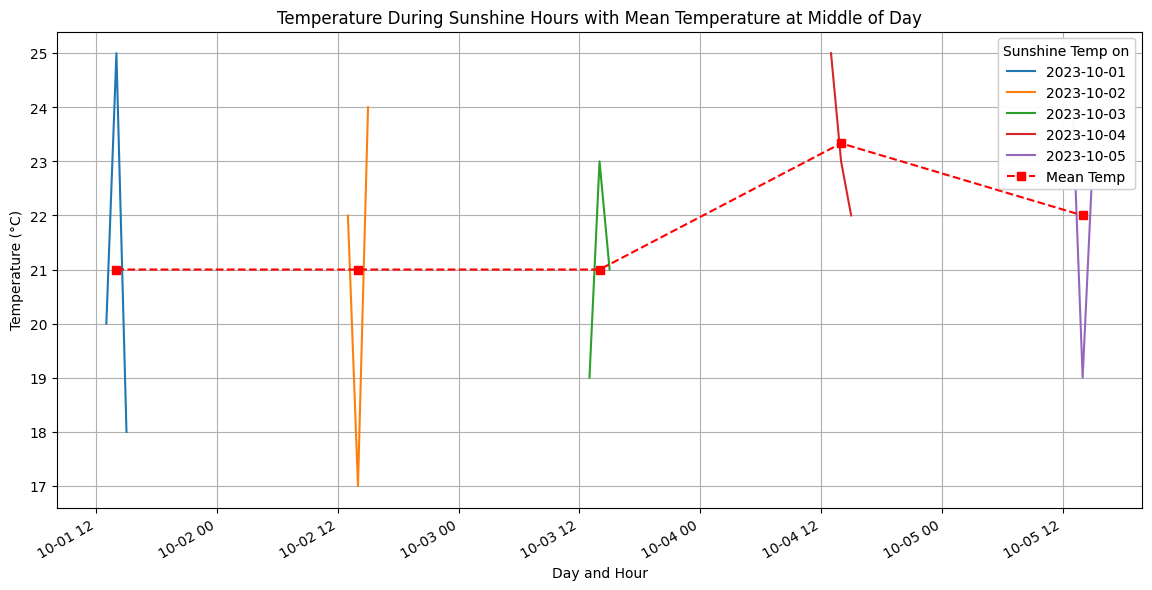

(13, 15)

In [59]:


# Create a plot
plt.figure(figsize=(14, 7))

# Iterate through each group (day)
mean_data = []
pos_data = []

for date, group in sunshine_groups:
    # Plot temperature for sunshine hours
    plt.plot(group['datetime'], group['temperature'], label=f'{date.date()}')
    #plt.xticks(ticks=range(len(group)))
    # Calculate mean temperature for the day
    mean_temp = group['temperature'].mean()
    mean_data.append(mean_temp)
    
    # Find the middle datetime of the day
    middle_datetime = group['datetime'].iloc[len(group)//2]
    pos_data.append(middle_datetime)
    

# Plot the mean temperature at the middle datetime
plt.plot(pos_data, mean_data, color='red', marker='s', linestyle='--', label=f'Mean Temp')


# Add a title for the temperature lines in the legend
legend1 = plt.legend(title="Sunshine Temp on", loc="upper right")
# Add the first legend back to the plot
plt.gca().add_artist(legend1)
# Add labels and legend
plt.xlabel('Day and Hour')
plt.ylabel('Temperature (°C)')
plt.title('Temperature During Sunshine Hours with Mean Temperature at Middle of Day')
# Add a separate legend for the mean temperature
#plt.legend()
plt.grid(True)

# Format x-axis to show both date and hour
plt.gcf().autofmt_xdate()  # Rotate x-axis labels for better readability

plt.show()
start, end, #sunshine_groups.head(3)

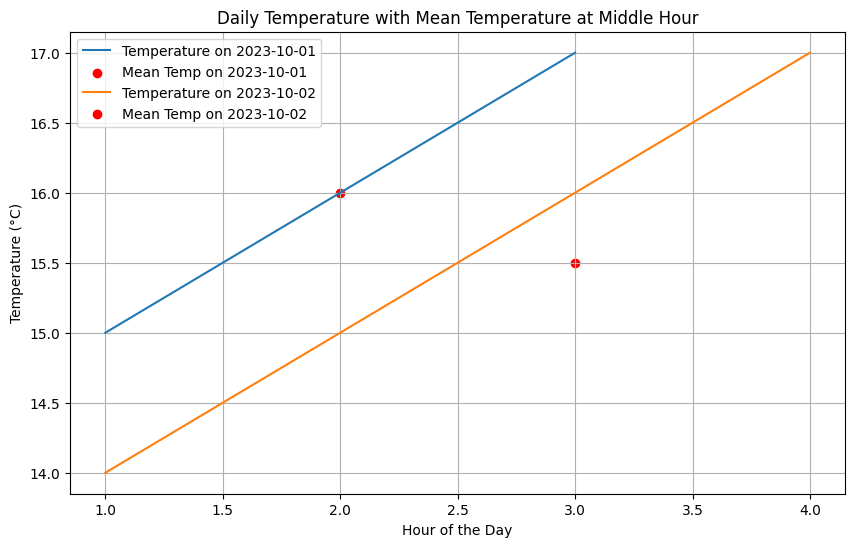

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
data3 = {
    'date': ['2023-10-01', '2023-10-01', '2023-10-01', '2023-10-02', '2023-10-02', '2023-10-02', '2023-10-02'],
    'hour': [1, 2, 3, 1, 2, 3, 4],
    'temperature': [15, 16, 17, 14, 15, 16, 17]
}
df2 = pd.DataFrame(data3)

# Convert 'date' column to datetime
df2['date'] = pd.to_datetime(df2['date'])

# Group by date
btgp = df2.groupby('date')

# Create a plot
plt.figure(figsize=(10, 6))

# Iterate through each group (day)
for date, group in btgp:
    # Plot temperature for the day
    plt.plot(group['hour'], group['temperature'], label=f'Temperature on {date.date()}')
    
    # Calculate mean temperature for the day
    mean_temp = group['temperature'].mean()
    
    # Find the middle hour of the day
    middle_hour = group['hour'].iloc[len(group)//2]
    
    # Plot the mean temperature at the middle hour
    plt.scatter(middle_hour, mean_temp, color='red', marker='o', label=f'Mean Temp on {date.date()}')

# Add labels and legend
plt.xlabel('Hour of the Day')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature with Mean Temperature at Middle Hour')
plt.legend()
plt.grid(True)
plt.show()

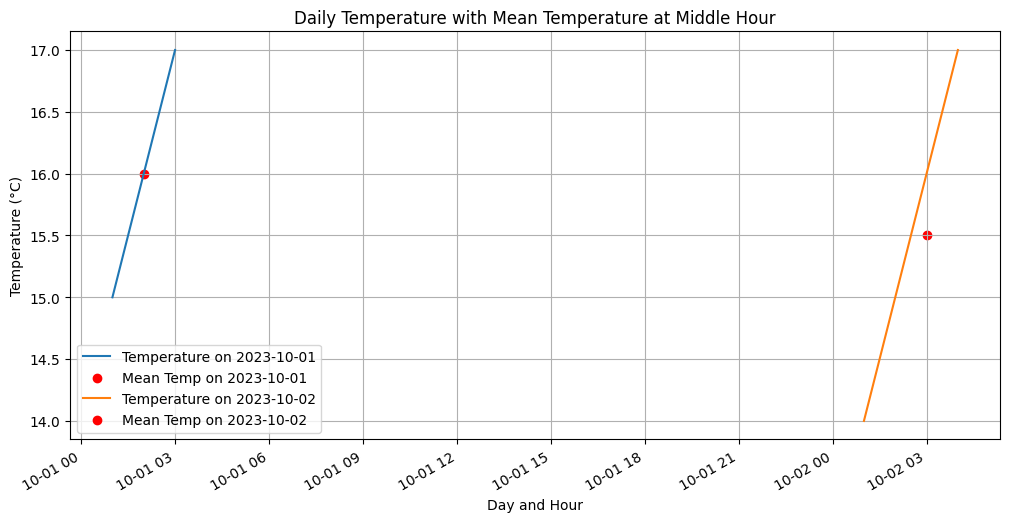

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame
data3 = {
    'date': ['2023-10-01', '2023-10-01', '2023-10-01', '2023-10-02', '2023-10-02', '2023-10-02', '2023-10-02'],
    'hour': [1, 2, 3, 1, 2, 3, 4],
    'temperature': [15, 16, 17, 14, 15, 16, 17]
}
df3 = pd.DataFrame(data3)

# Convert 'date' column to datetime
df3['date'] = pd.to_datetime(df3['date'])

# Combine 'date' and 'hour' into a single datetime column
df3['datetime'] = df3['date'] + pd.to_timedelta(df3['hour'], unit='h')

# Group by date
btgp = df3.groupby('date')

# Create a plot
plt.figure(figsize=(12, 6))

# Iterate through each group (day)
for date, group in btgp:
    # Plot temperature for the day
    plt.plot(group['datetime'], group['temperature'], label=f'Temperature on {date.date()}')
    
    # Calculate mean temperature for the day
    mean_temp = group['temperature'].mean()
    
    # Find the middle datetime of the day
    middle_datetime = group['datetime'].iloc[len(group)//2]
    
    # Plot the mean temperature at the middle datetime
    plt.scatter(middle_datetime, mean_temp, color='red', marker='o', label=f'Mean Temp on {date.date()}')

# Add labels and legend
plt.xlabel('Day and Hour')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature with Mean Temperature at Middle Hour')
plt.legend()
plt.grid(True)

# Format x-axis to show both date and hour
plt.gcf().autofmt_xdate()  # Rotate x-axis labels for better readability

plt.show()

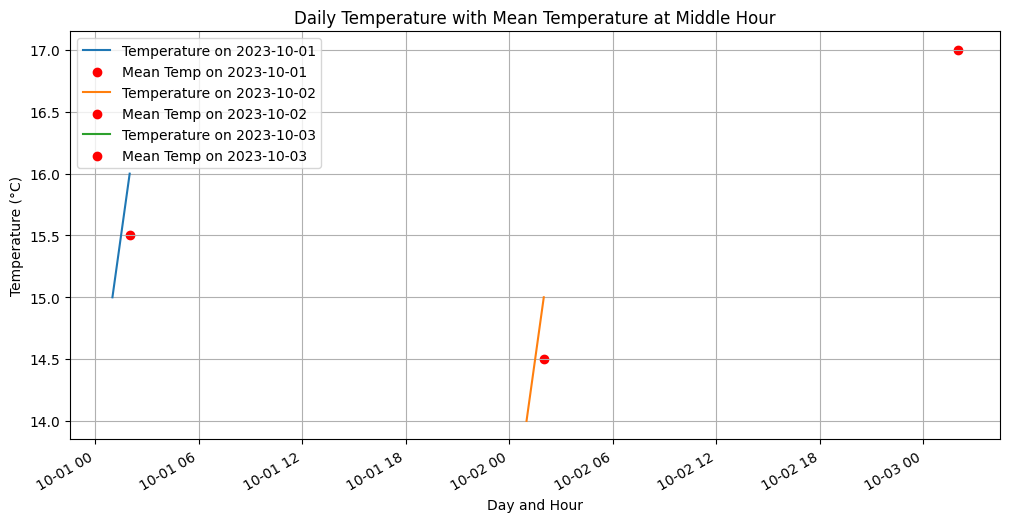

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame with some missing temperature values
data = {
    'date': ['2023-10-01', '2023-10-01', '2023-10-01', '2023-10-02', '2023-10-02', '2023-10-02', '2023-10-03'],
    'hour': [1, 2, 3, 1, 2, 4, 2],  # Note: Hour 3 is missing for 2023-10-02
    'temperature': [15, 16, None, 14, 15, None, 17]  # None represents missing temperature
}
df = pd.DataFrame(data)

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Combine 'date' and 'hour' into a single datetime column
df['datetime'] = df['date'] + pd.to_timedelta(df['hour'], unit='h')

# Drop rows where temperature is missing
df = df.dropna(subset=['temperature'])

# Group by date
btgp = df.groupby('date')

# Create a plot
plt.figure(figsize=(12, 6))

# Iterate through each group (day)
for date, group in btgp:
    # Plot temperature for the day
    plt.plot(group['datetime'], group['temperature'], label=f'Temperature on {date.date()}')
    
    # Calculate mean temperature for the day
    mean_temp = group['temperature'].mean()
    
    # Find the middle datetime of the day
    middle_datetime = group['datetime'].iloc[len(group)//2]
    
    # Plot the mean temperature at the middle datetime
    plt.scatter(middle_datetime, mean_temp, color='red', marker='o', label=f'Mean Temp on {date.date()}')

# Add labels and legend
plt.xlabel('Day and Hour')
plt.ylabel('Temperature (°C)')
plt.title('Daily Temperature with Mean Temperature at Middle Hour')
plt.legend()
plt.grid(True)

# Format x-axis to show both date and hour
plt.gcf().autofmt_xdate()  # Rotate x-axis labels for better readability

plt.show()

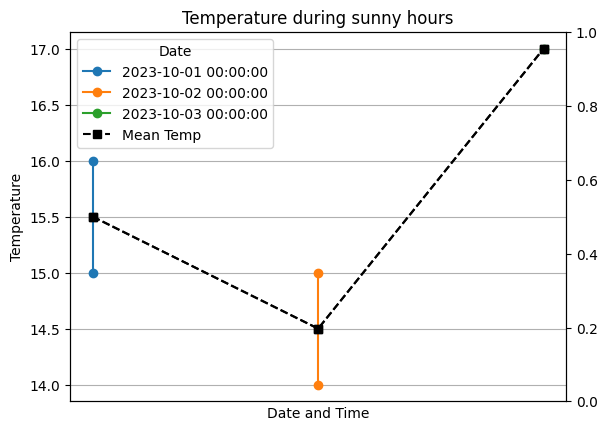

In [63]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

for name, group in btgp:
    ax1.plot(group['date'], group['temperature'], marker='o', linestyle='-', label=name)

mean_temp = btgp['temperature'].mean()
ax1.plot(mean_temp.index, mean_temp.values, marker='s', linestyle='--', color='black', label='Mean Temp')

ax1.set_xlabel('Date and Time')
ax1.set_ylabel('Temperature')
ax1.set_title('Temperature during sunny hours')
ax1.legend(title='Date')
ax1.grid()



plt.xticks(ticks=range(len(d2)), labels=d2)
ax1.plot(mean_temp.index, mean_temp.values, marker='s', linestyle='--', color='black', label='Mean Temp')
plt.show()


In [64]:
# first 24 h
current[:8][['h_date','temp','depression','tendances']]

,h_date,temp,depression,tendances
0,22/05/2025 17:00:00,17.62,10.846693,beau temps
1,22/05/2025 20:00:00,16.78,9.636326,beau temps
2,22/05/2025 23:00:00,11.60,5.285535,beau temps
3,23/05/2025 02:00:00,10.93,5.464894,beau temps
4,23/05/2025 05:00:00,10.11,6.724255,beau temps
5,23/05/2025 08:00:00,9.78,8.358517,beau temps
6,23/05/2025 11:00:00,13.67,13.013328,beau temps
7,23/05/2025 14:00:00,16.76,16.786785,beau temps


In [65]:
# next 4 days 
for i in range(1,5):
    print(current[8*i:8*(i+1)][['h_date','temp','depression','tendances']])

                 h_date   temp  depression   tendances
8   23/05/2025 17:00:00  18.08   16.955596  beau temps
9   23/05/2025 20:00:00  16.04   13.253404  beau temps
10  23/05/2025 23:00:00  12.98    9.625906  beau temps
11  24/05/2025 02:00:00  10.94    8.186692  beau temps
12  24/05/2025 05:00:00   9.94    6.715157  beau temps
13  24/05/2025 08:00:00  11.94    8.004468  beau temps
14  24/05/2025 11:00:00  16.05    9.582161  beau temps
15  24/05/2025 14:00:00  13.65    2.835250       pluie
                 h_date   temp  depression   tendances
16  24/05/2025 17:00:00  12.69    2.108977       pluie
17  24/05/2025 20:00:00  15.79    4.026187       pluie
18  24/05/2025 23:00:00  15.02    3.236443       pluie
19  25/05/2025 02:00:00  14.12    2.664827       pluie
20  25/05/2025 05:00:00  13.85    0.950171       pluie
21  25/05/2025 08:00:00  14.02    1.447340       pluie
22  25/05/2025 11:00:00  16.21    3.266797       pluie
23  25/05/2025 14:00:00  19.84    6.543029  beau temps
          

In [66]:
t = list("1234546")
t

sum((int(n)) for n in list(t))

25